In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def konwertuj_regule_binarnie(rule_number):
    return np.array([int(x) for x in f'{rule_number:08b}'], dtype=int)

In [38]:
def zastosuj_regule(rule_binary, left, center, right):
    index = 7 - ((left << 2) | (center << 1) | right)
    return rule_binary[index]

In [39]:
def generuj_regule(initial_state, number_of_generations, rule_number):
    number_of_cells = len(initial_state)
    grid = np.zeros((num_generations, number_of_cells), dtype=int)
    grid[0] = initial_state
    rule_binary = konwertuj_regule_binarnie(rule_number)

    for generation in range(1, number_of_generations):
        for i in range(1, number_of_cells - 1):
            grid[generation, i] = zastosuj_regule(rule_binary, grid[generation-1, i-1], grid[generation-1, i], grid[generation-1, i+1])
        grid[generation, 0] = zastosuj_regule(rule_binary, 0, grid[generation-1, 0], grid[generation-1, 1])
        grid[generation, -1] = zastosuj_regule(rule_binary, grid[generation-1, -2], grid[generation-1, -1], 0)
    return grid

In [40]:
def rysuj_generacje(grid, rule_number):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='binary', interpolation='nearest')
    plt.title(f'Automat komórkowy Reguła {rule_number}')
    plt.xlabel('Index komórki')
    plt.ylabel('Generacja')
    plt.show()

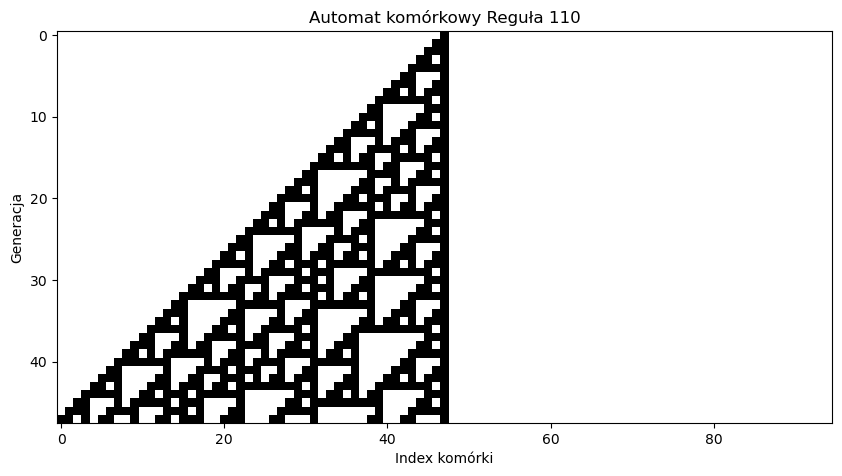

In [41]:
num_cells = 95
num_generations = 48
rule_number = 110
initial_state = [0] * num_cells
initial_state[num_cells // 2] = 1

grid = generuj_regule(initial_state, num_generations, rule_number)
rysuj_generacje(grid, rule_number)